# Superposition in time with the erfc function

IHE, Delft, 20200106

@T.N.Olsthoorn


See page 56 of the syllabus

## Context

Consider a situation where groundwater is directly subject to varying surface water levels at $x=0$.

Show the varying groundwater head given x distances over a given period of time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

### Convenience function for easy plotting

In [4]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

The problem can be solved by superposition. For this we write the analytical solution as

$$s(x, t) = \sum_{i=0}^n \left( \delta A_i \, \mbox{erfc}\sqrt{\frac {x^2 A}{4 kD (t - t_{ci})}} \right)$$

Where $t_{ci}$ is the $i$-th change time, where $t_c$ is a series of times at which the head suddenly changes by an amount $\delta A_i$.

Notice that the change times are completely independent of the time $t$. The time $t$ will be an array of times for which we want the head to be computed and not the times at which the head suddenly changes.

The superposition formula shows that each sudden stage change $\delta A_i$ will last forever for $t>t_{ci}$ and is zoro or absent for $t<t_{ci}$

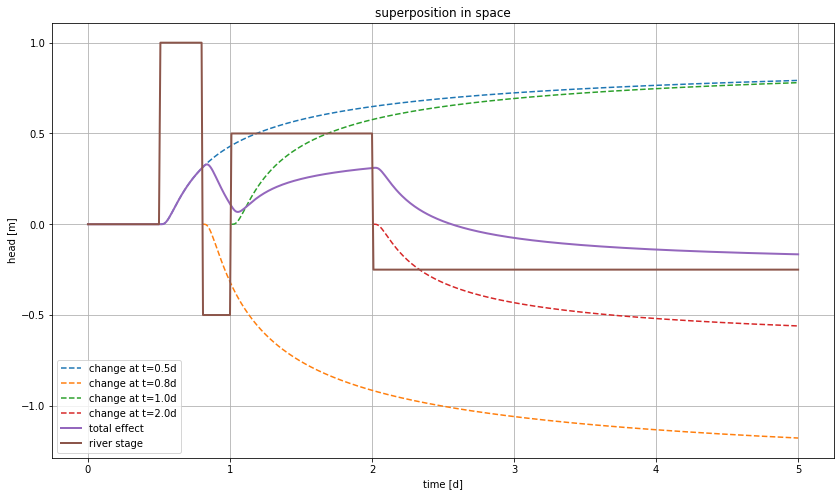

In [15]:
# The aquifer properties

kD = 400 # m2/d
S = 0.1 # [-]

# using arrays instead of lists is convenient in computations
A     = np.array([1.0, -0.5, +0.5, -0.25]) # [m] river stage
dA    = np.diff(np.hstack((0, A))) # [m] the series of head changes.
tc    = np.array([0.5,  0.8,  1.0,  2.0]) # [d] change time series

x =50 # distance to be considered

t = np.linspace(0, 5, 501) # period to be considered (5 days)
t[0] = 1e-6 # prevents division by zero

# Intialize the groundwater head to be all zeros
sriv = np.zeros_like(t)
s = np.zeros_like(t)

# set up the plot
ax = newfig('superposition in space', 'time [d]', 'head [m]')

# Loop over all changes times
for tci, dai in zip(tc, dA):
    u = np.sqrt(x ** 2 * S / (4 * kD * (t[t>tci] - tci)))
    ds = dai * sp.erfc(u)
    ax.plot(t[t > tci], ds, '--', label=f'change at t={tci:.2}d')
    s[   t > tci] += ds # add change due to this stage to total
    sriv[t > tci] += dai * sp.erfc(u * 0.) # siply multiply u * 0 for the situation at x=0 = riv
ax.plot(t, s, linewidth=2, label='total effect')
ax.plot(t, sriv, linewidth=2, label='river stage')

plt.legend()
